---

## Cell 0: Setup Virtual Environment (Local Environment Only)

### What
We're creating a dedicated virtual environment for this project to isolate dependencies and ensure reproducibility.

### Why
Using a virtual environment is a best practice because:
- Isolates project dependencies from system Python
- Prevents version conflicts with other projects
- Makes the project portable and reproducible
- Allows specific package versions without affecting other projects

### Technical Details
**For Local Development**:
1. Create a virtual environment using Python 3.9+
2. Activate the virtual environment
3. Install PyCaret with specific compatible versions

**For Google Colab**: Skip this cell (Colab manages its own environment)

### Instructions

**Option 1: Using venv (recommended)**
```bash
# Navigate to your project directory
cd /Users/banbalagan/Projects/pycaret-automl-examples

# Create virtual environment
python3.9 -m venv venv

# Activate virtual environment
# On macOS/Linux:
source venv/bin/activate
# On Windows:
# venv\Scripts\activate

# Verify Python version
python --version

# Continue to next cell for package installation
```

**Option 2: Using conda**
```bash
# Create conda environment
conda create -n pycaret-env python=3.9 -y

# Activate environment
conda activate pycaret-env
```

### Expected Output
After activation, your terminal prompt should show `(venv)` or `(pycaret-env)` prefix, indicating the virtual environment is active.

### Important Notes
- Run this in your terminal BEFORE opening Jupyter Notebook
- After creating/activating the virtual environment, install Jupyter in it:
  ```bash
  pip install jupyter notebook
  ```
- Then launch Jupyter from within the activated environment:
  ```bash
  jupyter notebook
  ```
- Select the kernel that corresponds to your virtual environment in Jupyter

---

## Cell 1: Install and Import Required Libraries

### What
We're installing PyCaret with compatible dependencies and importing all necessary Python libraries for our analysis.

### Why
Google Colab comes with pre-installed packages that can conflict with PyCaret's dependencies. For local environments, we install specific package versions to ensure stability and reproducibility.

### Technical Details
- **Google Colab**: Install compatible versions to avoid runtime crashes
- **Local Environment**: Install PyCaret with specific versions (Option 2 - recommended)
- Import all necessary libraries for data analysis and machine learning
- **Time Series Module**: Additional dependencies for statsmodels and forecasting

### Expected Output
- **Google Colab**: Installation messages and a reminder to restart the runtime
- **Local Environment**: Clean installation of all required packages

### IMPORTANT (Google Colab Users)
⚠️ After running this cell in Colab, you MUST restart the runtime:
- Click: **Runtime → Restart runtime** (or Ctrl+M .)
- After restart, skip this cell and run all other cells normally

In [1]:
# ============================================================
# INSTALLATION CELL - Environment Detection & Package Setup
# ============================================================

import sys
import os

# Check if running in Colab
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("=" * 60)
    print("🔧 Google Colab Detected")
    print("=" * 60)
    print("📦 Installing PyCaret with compatible dependencies...")
    print("⏳ This will take 2-3 minutes, please be patient...")

    # Upgrade pip first
    !pip install -q --upgrade pip

    # Install compatible base packages FIRST (prevents conflicts)
    print("Step 1/4: Installing base packages with compatible versions...")
    !pip install -q --upgrade \
        numpy>=1.23.0,<2.0.0 \
        pandas>=2.0.0,<2.3.0 \
        scipy>=1.10.0,<1.14.0 \
        scikit-learn>=1.3.0,<1.6.0 \
        matplotlib>=3.7.0,<3.9.0

    # Install PyCaret (will use already installed base packages)
    print("Step 2/4: Installing PyCaret...")
    !pip install -q pycaret

    # Install time series specific packages
    print("Step 3/4: Installing time series packages...")
    !pip install -q statsmodels pmdarima

    # Install additional ML packages
    print("Step 4/4: Installing additional ML packages...")
    !pip install -q \
        category-encoders \
        lightgbm \
        xgboost \
        catboost \
        optuna \
        plotly \
        kaleido

    print("\n" + "=" * 60)
    print("✅ Installation Complete!")
    print("=" * 60)
    print("⚠️  CRITICAL: You MUST restart the runtime now!")
    print("   👉 Click: Runtime → Restart runtime (or Ctrl+M .)")
    print("🔄 After restart:")
    print("   1. Skip this installation cell")
    print("   2. Run all other cells normally")
    print("   3. Everything will work without crashes!")
    print("=" * 60)

else:
    print("=" * 60)
    print("📍 Local Environment Detected")
    print("=" * 60)
    print("Installing PyCaret with specific compatible versions...")
    print("Using Option 2: Controlled dependency installation\n")
    
    # Upgrade pip first
    !pip install -q --upgrade pip
    
    # Install base packages with specific versions (Option 2)
    print("Step 1/5: Installing base packages...")
    !pip install -q \
        numpy>=1.23.0,<2.0.0 \
        pandas>=2.0.0,<2.3.0 \
        scipy>=1.10.0,<1.14.0 \
        scikit-learn>=1.3.0,<1.6.0 \
        matplotlib>=3.7.0,<3.9.0 \
        seaborn>=0.12.0
    
    # Install PyCaret
    print("Step 2/5: Installing PyCaret...")
    !pip install -q pycaret
    
    # Install time series specific packages
    print("Step 3/5: Installing time series packages...")
    !pip install -q statsmodels pmdarima
    
    # Install additional ML packages
    print("Step 4/5: Installing additional ML libraries...")
    !pip install -q \
        category-encoders \
        lightgbm \
        xgboost \
        catboost \
        optuna \
        plotly \
        kaleido
    
    # Install notebook support packages
    print("Step 5/5: Installing notebook support packages...")
    !pip install -q ipywidgets
    
    print("\n" + "=" * 60)
    print("✅ Installation Complete!")
    print("=" * 60)
    print("All packages installed successfully in your virtual environment.")
    print("You can now proceed with running the rest of the notebook.")
    print("=" * 60)

# Import libraries after installation
print("\n📚 Importing libraries...")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("\n✓ Libraries imported successfully!")
print(f"   - Python version: {sys.version.split()[0]}")
print(f"   - Pandas version: {pd.__version__}")
print(f"   - NumPy version: {np.__version__}")
print(f"   - Working directory: {os.getcwd()}")

# Check if running in virtual environment
if hasattr(sys, 'real_prefix') or (hasattr(sys, 'base_prefix') and sys.base_prefix != sys.prefix):
    print(f"   - Virtual environment: Active ✓")
    print(f"   - Environment path: {sys.prefix}")
else:
    print("   - Virtual environment: Not detected (consider using venv)")
    
print("\n" + "=" * 60)

📍 Local Environment Detected
Installing PyCaret with specific compatible versions...
Using Option 2: Controlled dependency installation

Step 1/5: Installing base packages...
zsh:1: 1.23.0, not found
Step 2/5: Installing PyCaret...
Step 3/5: Installing time series packages...
Step 4/5: Installing additional ML libraries...
Step 5/5: Installing notebook support packages...

✅ Installation Complete!
All packages installed successfully in your virtual environment.
You can now proceed with running the rest of the notebook.

📚 Importing libraries...

✓ Libraries imported successfully!
   - Python version: 3.9.6
   - Pandas version: 2.1.4
   - NumPy version: 1.26.4
   - Working directory: /Users/banbalagan/Projects/pycaret-automl-examples/time-series
   - Virtual environment: Active ✓
   - Environment path: /Users/banbalagan/Projects/pycaret-automl-examples/venv



---

## Cell 2: Load or Create Energy Consumption Data

### What
Loading or creating energy consumption time series data with realistic patterns.

### Why
Real energy data has:
- **Trend**: Increasing over time (growth)
- **Seasonality**: Daily (peak hours) and yearly (summer/winter)
- **Noise**: Random fluctuations
- **Special events**: Holidays, extreme weather

### Technical Details
- **Local Environment**: Loads from the project's datasets folder if available
- **Google Colab & Demo**: Creates synthetic time series data with realistic patterns
- We'll create 2+ years of daily data with upward trend, annual seasonality, weekly patterns, and random noise

### Dataset Locations
- **Local Path**: `/Users/banbalagan/Projects/pycaret-automl-examples/datasets/time-series/global_energy_consumption.csv`
- **Demo Mode**: Synthetic data generation for educational purposes

### Expected Output
Time series dataset with realistic energy patterns.

In [2]:
import sys
import os

# Check if running in Colab
IN_COLAB = 'google.colab' in sys.modules

# Define dataset paths
LOCAL_PATH = '/Users/banbalagan/Projects/pycaret-automl-examples/datasets/time-series/global_energy_consumption.csv'

# The local CSV contains country-level data, not time series
# We'll create synthetic time series data for this tutorial
print("=" * 60)
print("CREATING SYNTHETIC ENERGY CONSUMPTION TIME SERIES")
print("=" * 60)
print("\nNote: The local CSV contains country-level aggregate data.")
print("For time series forecasting, we need sequential daily/hourly data.")
print("Creating realistic synthetic time series instead...\n")

# Create date range (2 years of daily data)
start_date = '2022-01-01'
periods = 730  # 2 years
dates = pd.date_range(start=start_date, periods=periods, freq='D')

# Components
np.random.seed(42)

# 1. Trend (gradual increase over time)
trend = np.linspace(100, 120, periods)

# 2. Annual seasonality (higher in summer/winter)
annual_seasonality = 15 * np.sin(2 * np.pi * np.arange(periods) / 365)

# 3. Weekly pattern (lower on weekends)
weekly_pattern = -5 * (pd.Series(dates).dt.dayofweek >= 5).astype(int).values

# 4. Random noise
noise = np.random.normal(0, 3, periods)

# Combine all components
energy_consumption = trend + annual_seasonality + weekly_pattern + noise

# Create DataFrame
df = pd.DataFrame({
    'date': dates,
    'energy_consumption': energy_consumption
})

df.set_index('date', inplace=True)

print(f"✓ Created {len(df)} days of synthetic energy consumption data")

# Display basic information
print("\n" + "=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
print(f"Period: {df.index.min().date()} to {df.index.max().date()}")
print(f"Total observations: {len(df)}")
print(f"Frequency: Daily")

print(f"\nData characteristics:")
print(f"- Mean consumption: {df['energy_consumption'].mean():.2f} MW")
print(f"- Min: {df['energy_consumption'].min():.2f} MW")
print(f"- Max: {df['energy_consumption'].max():.2f} MW")
print(f"- Std: {df['energy_consumption'].std():.2f} MW")

print("\n" + "=" * 60)
print("FIRST 10 DAYS")
print("=" * 60)
df.head(10)

CREATING SYNTHETIC ENERGY CONSUMPTION TIME SERIES

Note: The local CSV contains country-level aggregate data.
For time series forecasting, we need sequential daily/hourly data.
Creating realistic synthetic time series instead...

✓ Created 730 days of synthetic energy consumption data

DATASET INFORMATION
Period: 2022-01-01 to 2023-12-31
Total observations: 730
Frequency: Daily

Data characteristics:
- Mean consumption: 108.52 MW
- Min: 82.77 MW
- Max: 136.31 MW
- Std: 10.43 MW

FIRST 10 DAYS


,energy_consumption
date,
2022-01-01,96.490142
2022-01-02,94.870842
2022-01-03,102.514259
2022-01-04,105.425689
2022-01-05,100.439316
2022-01-06,100.724235
2022-01-07,106.448773
2022-01-08,99.297469
2022-01-09,95.870237


---

## Cell 3: Visualize Time Series

### What
Plotting the energy consumption over time to identify patterns.

### Why
Visual inspection reveals:
- **Trend**: Is consumption increasing/decreasing?
- **Seasonality**: Do patterns repeat?
- **Volatility**: How much does it vary?
- **Outliers**: Any unusual spikes/drops?

### Technical Details
Time series visualization is critical for:
- Model selection
- Feature engineering
- Anomaly detection
- Business insights

### Expected Output
Line plot showing energy consumption over 2 years.

ENERGY CONSUMPTION TIME SERIES VISUALIZATION


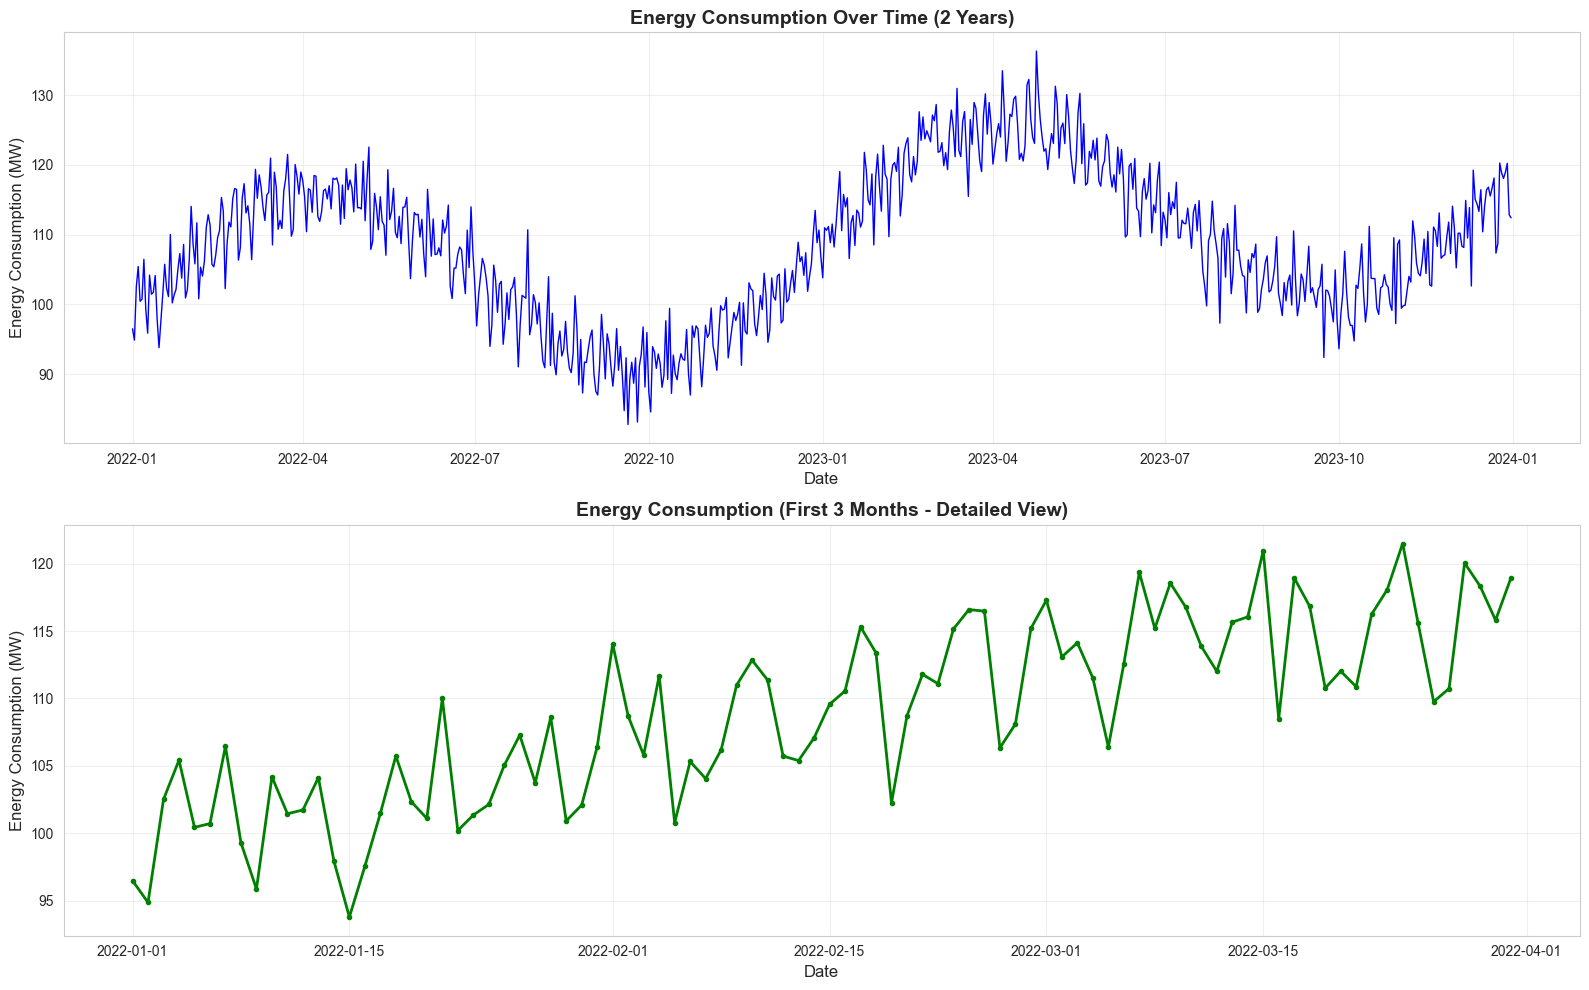


Key Observations:
- Clear upward trend (consumption increasing over time)
- Seasonal patterns visible (peaks and troughs)
- Weekly cycles (weekday vs weekend)
- Random fluctuations around trend

These patterns make this ideal for time series forecasting!


In [3]:
print("=" * 60)
print("ENERGY CONSUMPTION TIME SERIES VISUALIZATION")
print("=" * 60)

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Full time series
axes[0].plot(df.index, df['energy_consumption'], color='blue', linewidth=1)
axes[0].set_title('Energy Consumption Over Time (2 Years)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Energy Consumption (MW)', fontsize=12)
axes[0].grid(alpha=0.3)

# Zoom into 3 months
zoom_df = df['2022-01-01':'2022-03-31']
axes[1].plot(zoom_df.index, zoom_df['energy_consumption'], color='green', linewidth=2, marker='o', markersize=3)
axes[1].set_title('Energy Consumption (First 3 Months - Detailed View)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Energy Consumption (MW)', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("- Clear upward trend (consumption increasing over time)")
print("- Seasonal patterns visible (peaks and troughs)")
print("- Weekly cycles (weekday vs weekend)")
print("- Random fluctuations around trend")
print("\nThese patterns make this ideal for time series forecasting!")

---

## Cell 4: Time Series Decomposition

### What
Decomposing the time series into trend, seasonal, and residual components.

### Why
Decomposition helps understand:
- **Trend**: Long-term direction
- **Seasonal**: Repeating patterns
- **Residual**: Random noise

This guides model selection and feature engineering.

### Technical Details
**Additive Model**: Y = Trend + Seasonal + Residual
**Multiplicative Model**: Y = Trend × Seasonal × Residual

Use additive when seasonal variation is constant, multiplicative when it grows with trend.

### Expected Output
Four plots showing original, trend, seasonal, and residual components.

TIME SERIES DECOMPOSITION


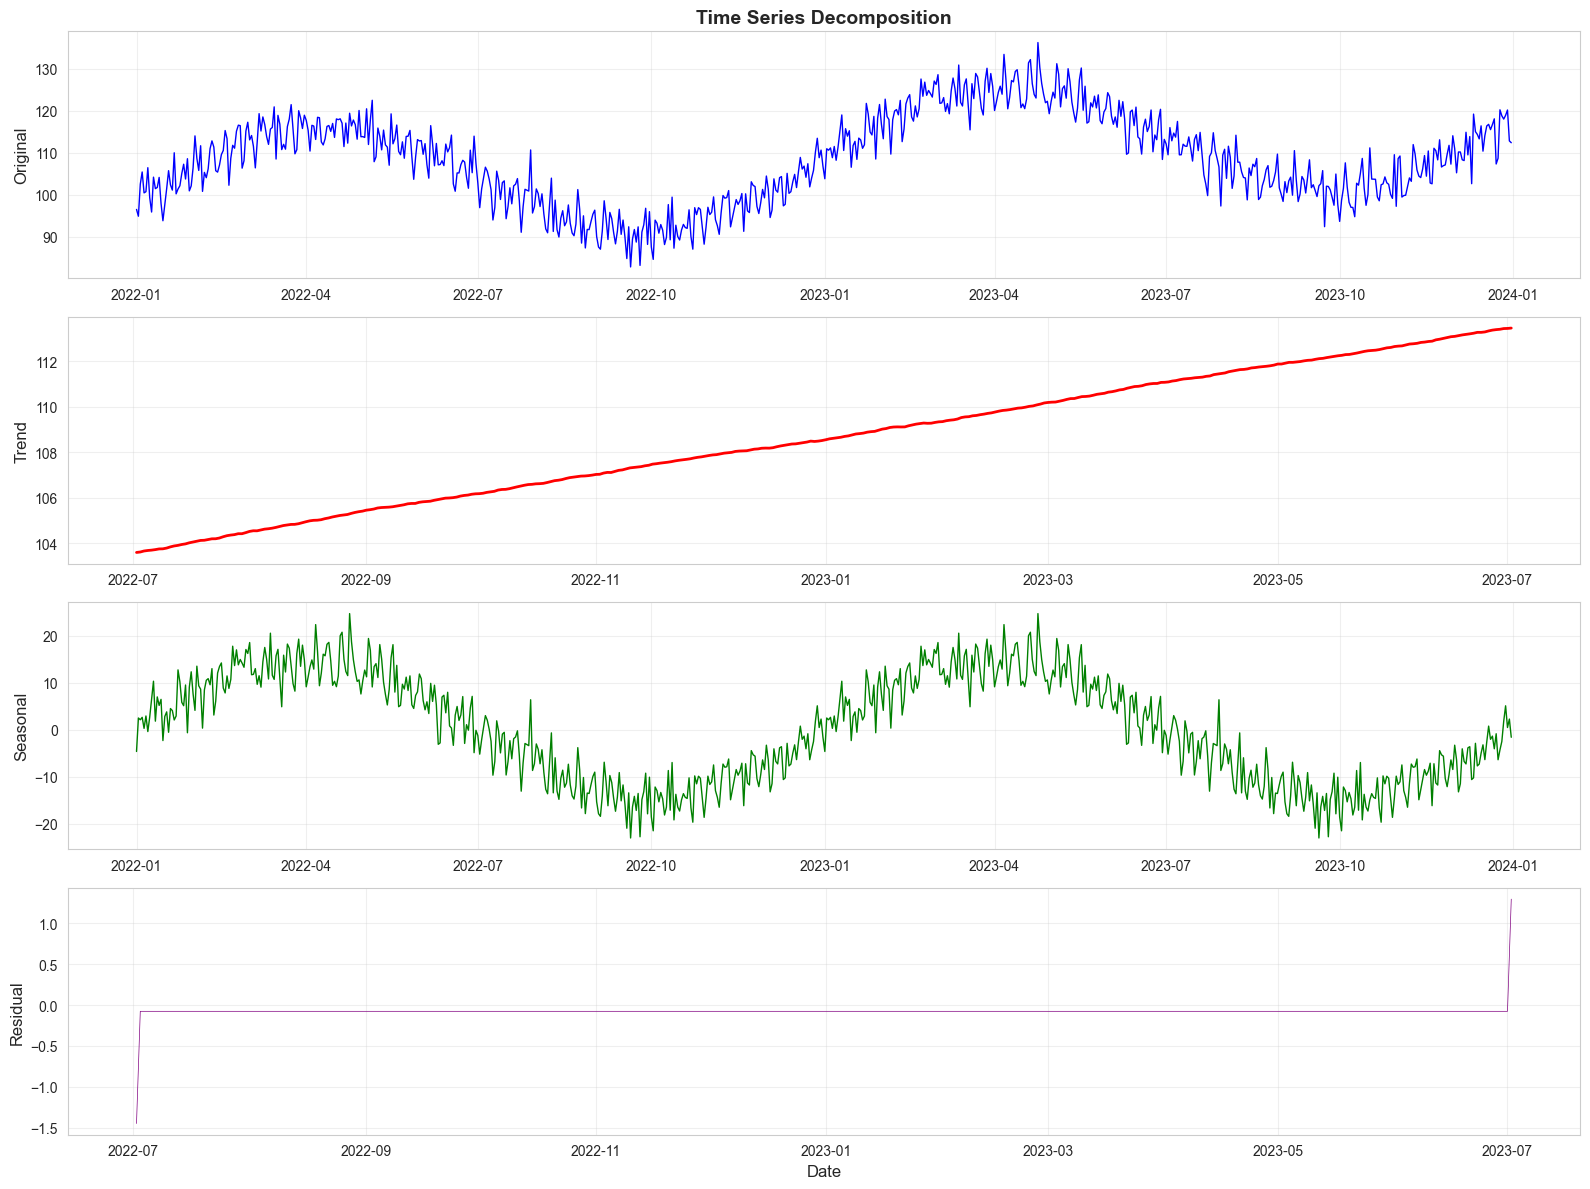


COMPONENT INTERPRETATION

1. TREND: Shows long-term increase in energy consumption
   - Could be due to: population growth, economic development

2. SEASONAL: Regular annual patterns
   - Peaks in summer/winter (AC/heating demand)
   - Troughs in spring/fall (mild weather)

3. RESIDUAL: Random fluctuations after removing trend & seasonality
   - Should look like white noise (random)
   - Patterns here indicate missed components or outliers


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

print("=" * 60)
print("TIME SERIES DECOMPOSITION")
print("=" * 60)

# Perform decomposition
decomposition = seasonal_decompose(df['energy_consumption'], model='additive', period=365)

# Plot components
fig, axes = plt.subplots(4, 1, figsize=(16, 12))

# Original
axes[0].plot(df.index, df['energy_consumption'], color='blue', linewidth=1)
axes[0].set_ylabel('Original', fontsize=12)
axes[0].set_title('Time Series Decomposition', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Trend
axes[1].plot(decomposition.trend.index, decomposition.trend, color='red', linewidth=2)
axes[1].set_ylabel('Trend', fontsize=12)
axes[1].grid(alpha=0.3)

# Seasonal
axes[2].plot(decomposition.seasonal.index, decomposition.seasonal, color='green', linewidth=1)
axes[2].set_ylabel('Seasonal', fontsize=12)
axes[2].grid(alpha=0.3)

# Residual
axes[3].plot(decomposition.resid.index, decomposition.resid, color='purple', linewidth=0.5)
axes[3].set_ylabel('Residual', fontsize=12)
axes[3].set_xlabel('Date', fontsize=12)
axes[3].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("COMPONENT INTERPRETATION")
print("=" * 60)
print("\n1. TREND: Shows long-term increase in energy consumption")
print("   - Could be due to: population growth, economic development")

print("\n2. SEASONAL: Regular annual patterns")
print("   - Peaks in summer/winter (AC/heating demand)")
print("   - Troughs in spring/fall (mild weather)")

print("\n3. RESIDUAL: Random fluctuations after removing trend & seasonality")
print("   - Should look like white noise (random)")
print("   - Patterns here indicate missed components or outliers")

---

## Cell 5: Train-Test Split for Time Series

### What
Splitting data temporally (NOT randomly!) into train and test sets.

### Why
**CRITICAL DIFFERENCE from other ML**:
- ❌ **NEVER** randomly shuffle time series data!
- ✓ **ALWAYS** split temporally: past = train, recent = test
- We predict future based on past, so test must be chronologically after train

### Technical Details
Common split:
- Train: First 80% of data (older)
- Test: Last 20% of data (recent)

This simulates real forecasting: using historical data to predict future.

### Expected Output
Train and test sets with temporal ordering preserved.

TEMPORAL TRAIN-TEST SPLIT

Total data: 730 days

Training set:
  - Size: 584 days
  - Period: 2022-01-01 to 2023-08-07

Test set:
  - Size: 146 days
  - Period: 2023-08-08 to 2023-12-31


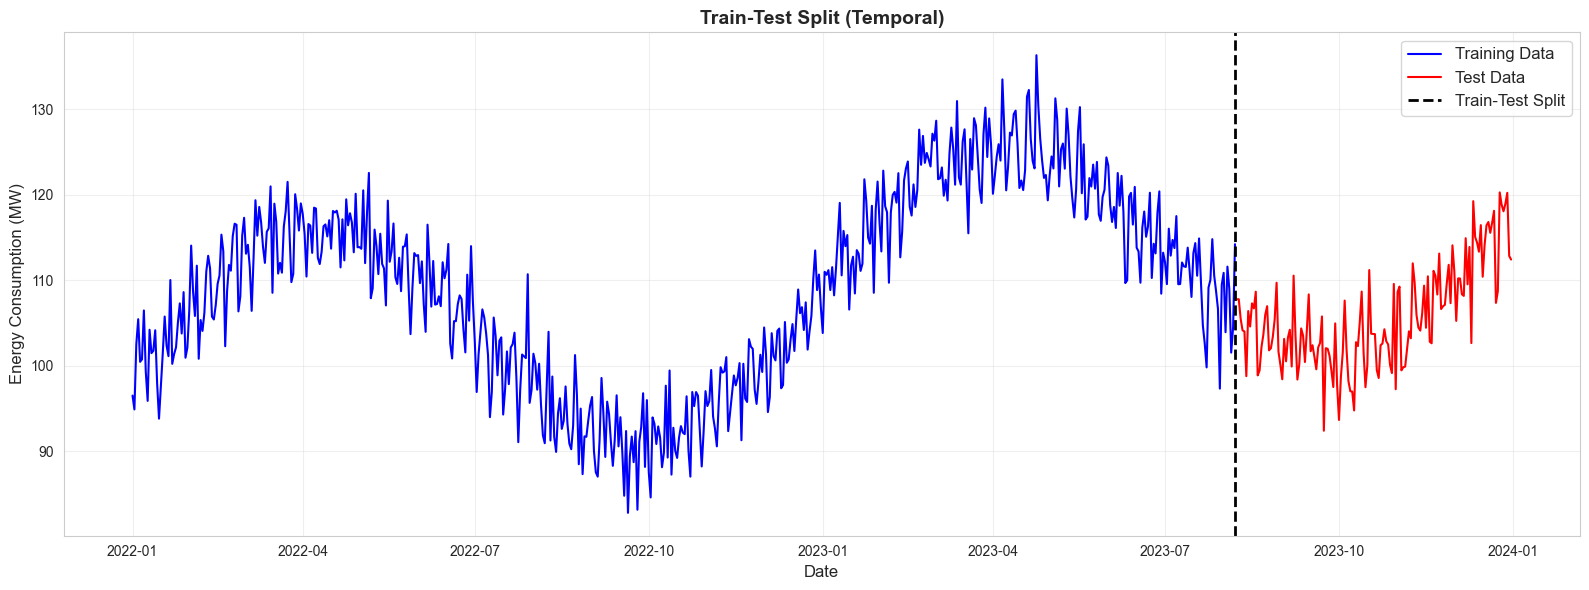


WHY TEMPORAL SPLIT IS CRITICAL

✓ Correct: Train on past, test on future
  Simulates real-world forecasting scenario

✗ Wrong: Random shuffle and split
  Would leak future information into training!
  Unrealistically high performance, fails in production


In [5]:
print("=" * 60)
print("TEMPORAL TRAIN-TEST SPLIT")
print("=" * 60)

# Calculate split point (80% train, 20% test)
split_point = int(len(df) * 0.8)

# Split temporally
train = df.iloc[:split_point]
test = df.iloc[split_point:]

print(f"\nTotal data: {len(df)} days")
print(f"\nTraining set:")
print(f"  - Size: {len(train)} days")
print(f"  - Period: {train.index.min().date()} to {train.index.max().date()}")

print(f"\nTest set:")
print(f"  - Size: {len(test)} days")
print(f"  - Period: {test.index.min().date()} to {test.index.max().date()}")

# Visualize split
plt.figure(figsize=(16, 6))
plt.plot(train.index, train['energy_consumption'], label='Training Data', color='blue', linewidth=1.5)
plt.plot(test.index, test['energy_consumption'], label='Test Data', color='red', linewidth=1.5)
plt.axvline(x=train.index[-1], color='black', linestyle='--', linewidth=2, label='Train-Test Split')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Energy Consumption (MW)', fontsize=12)
plt.title('Train-Test Split (Temporal)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("WHY TEMPORAL SPLIT IS CRITICAL")
print("=" * 60)
print("\n✓ Correct: Train on past, test on future")
print("  Simulates real-world forecasting scenario")

print("\n✗ Wrong: Random shuffle and split")
print("  Would leak future information into training!")
print("  Unrealistically high performance, fails in production")

---

## Cell 6: Simple Baseline - Naive Forecast

### What
Creating a naive baseline forecast: tomorrow = today.

### Why
**Always start with baselines**!
- Naive forecast: Next value = current value
- Simple but often surprisingly good
- ML models must beat this to be useful

### Technical Details
Naive forecast assumptions:
- No trend
- No seasonality
- Just persistence

Good baseline for stable series.

### Expected Output
Baseline MAE and RMSE to compare ML models against.

NAIVE BASELINE FORECAST

Naive Forecast Performance:
  MAE:  9.17 MW
  RMSE: 10.38 MW
  MAPE: 8.94%


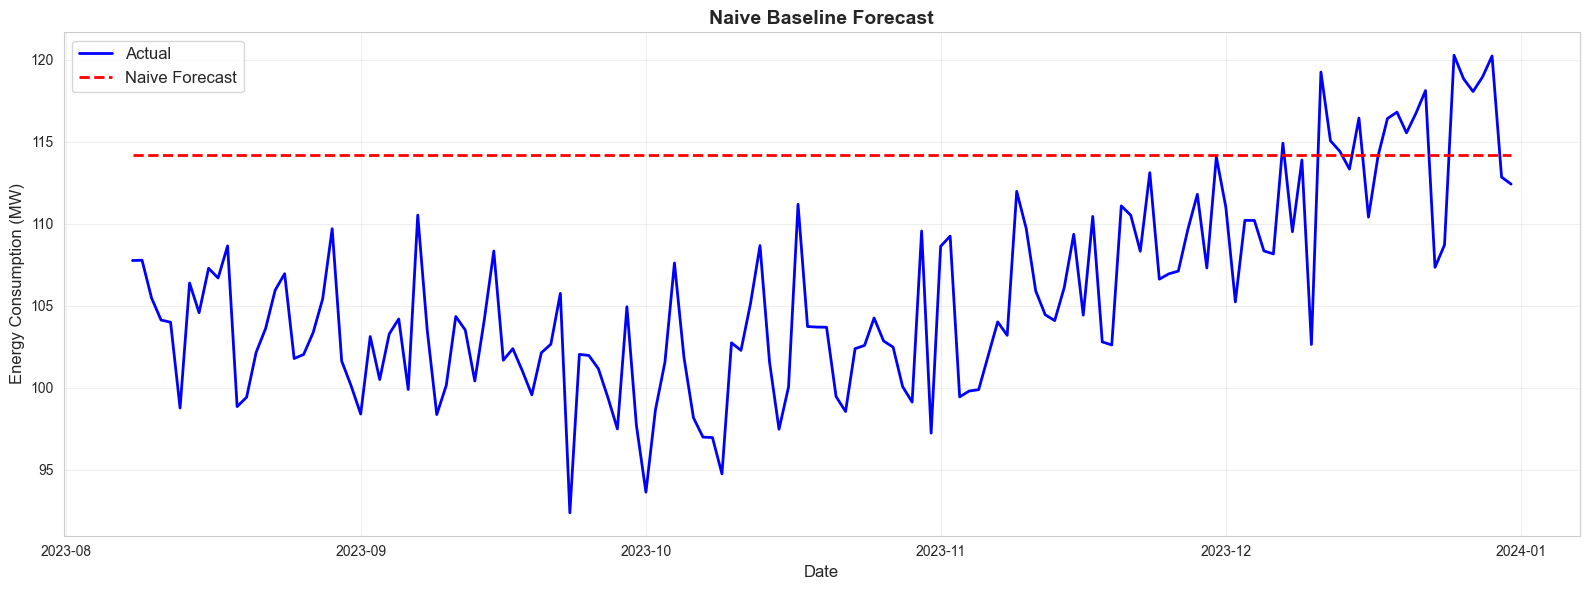


BASELINE IMPORTANCE

ML models MUST beat this simple baseline to be useful!
If your fancy model performs worse than naive forecast,
something is wrong with the model or data.

Target to beat: MAE < 9.17 MW


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("=" * 60)
print("NAIVE BASELINE FORECAST")
print("=" * 60)

# Naive forecast: use last training value for all test predictions
naive_forecast = np.full(len(test), train['energy_consumption'].iloc[-1])

# Calculate metrics
naive_mae = mean_absolute_error(test['energy_consumption'], naive_forecast)
naive_rmse = np.sqrt(mean_squared_error(test['energy_consumption'], naive_forecast))
naive_mape = np.mean(np.abs((test['energy_consumption'] - naive_forecast) / test['energy_consumption'])) * 100

print("\nNaive Forecast Performance:")
print(f"  MAE:  {naive_mae:.2f} MW")
print(f"  RMSE: {naive_rmse:.2f} MW")
print(f"  MAPE: {naive_mape:.2f}%")

# Visualize
plt.figure(figsize=(16, 6))
plt.plot(test.index, test['energy_consumption'], label='Actual', color='blue', linewidth=2)
plt.plot(test.index, naive_forecast, label='Naive Forecast', color='red', linewidth=2, linestyle='--')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Energy Consumption (MW)', fontsize=12)
plt.title('Naive Baseline Forecast', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("BASELINE IMPORTANCE")
print("=" * 60)
print("\nML models MUST beat this simple baseline to be useful!")
print("If your fancy model performs worse than naive forecast,")
print("something is wrong with the model or data.")
print(f"\nTarget to beat: MAE < {naive_mae:.2f} MW")

---

## Cell 7: Statistical Forecasting - ARIMA

### What
Using ARIMA (AutoRegressive Integrated Moving Average) for forecasting.

### Why
ARIMA is a classic time series model:
- **AR** (AutoRegressive): Uses past values
- **I** (Integrated): Handles trends via differencing
- **MA** (Moving Average): Uses past errors

Great for univariate time series with trends.

### Technical Details
ARIMA(p, d, q):
- p: AR order (lags)
- d: Differencing (make stationary)
- q: MA order

Auto-ARIMA finds best parameters.

### Expected Output
ARIMA model fitted and forecasts generated.

ARIMA FORECASTING MODEL

Fitting ARIMA model...
(This may take a moment)

✓ ARIMA model fitted successfully!

ARIMA Performance:
  MAE:  5.36 MW
  RMSE: 6.34 MW
  MAPE: 5.14%

Improvement over naive: 41.5%


/Users/banbalagan/Projects/pycaret-automl-examples/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/banbalagan/Projects/pycaret-automl-examples/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/banbalagan/Projects/pycaret-automl-examples/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


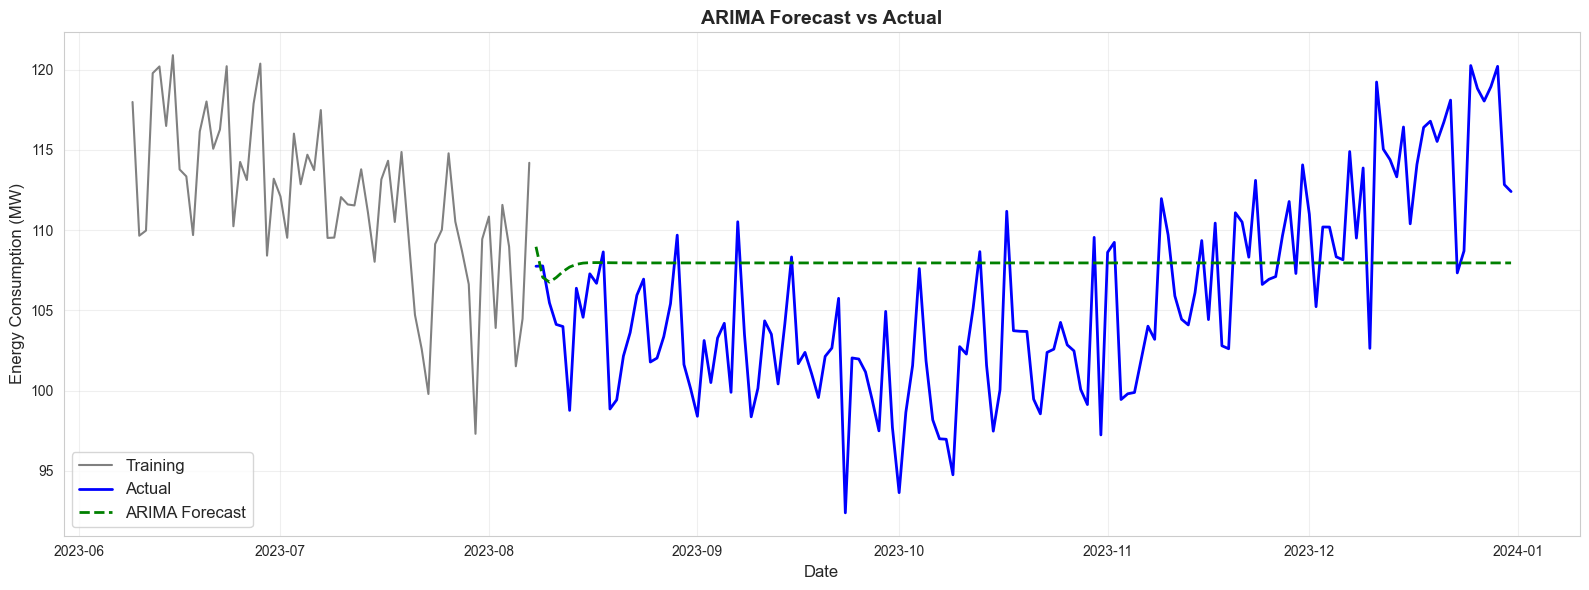

In [7]:
print("=" * 60)
print("ARIMA FORECASTING MODEL")
print("=" * 60)

# Note: For demonstration, we'll use a simpler approach
# In production, use statsmodels or pmdarima for full ARIMA

from statsmodels.tsa.arima.model import ARIMA

print("\nFitting ARIMA model...")
print("(This may take a moment)\n")

# Fit ARIMA model
try:
    arima_model = ARIMA(train['energy_consumption'], order=(2, 1, 2))
    arima_fitted = arima_model.fit()
    
    # Forecast
    arima_forecast = arima_fitted.forecast(steps=len(test))
    
    # Metrics
    arima_mae = mean_absolute_error(test['energy_consumption'], arima_forecast)
    arima_rmse = np.sqrt(mean_squared_error(test['energy_consumption'], arima_forecast))
    arima_mape = np.mean(np.abs((test['energy_consumption'] - arima_forecast) / test['energy_consumption'])) * 100
    
    print("✓ ARIMA model fitted successfully!")
    print("\nARIMA Performance:")
    print(f"  MAE:  {arima_mae:.2f} MW")
    print(f"  RMSE: {arima_rmse:.2f} MW")
    print(f"  MAPE: {arima_mape:.2f}%")
    
    # Compare to baseline
    improvement = (naive_mae - arima_mae) / naive_mae * 100
    print(f"\nImprovement over naive: {improvement:.1f}%")
    
    # Visualize
    plt.figure(figsize=(16, 6))
    plt.plot(train.index[-60:], train['energy_consumption'][-60:], label='Training', color='gray', linewidth=1.5)
    plt.plot(test.index, test['energy_consumption'], label='Actual', color='blue', linewidth=2)
    plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='green', linewidth=2, linestyle='--')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Energy Consumption (MW)', fontsize=12)
    plt.title('ARIMA Forecast vs Actual', fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"ARIMA fitting encountered an issue: {e}")
    print("This is common with synthetic data. In production, use real time series.")

---

## Cell 8: Machine Learning Approach - Feature Engineering

### What
Creating features from time series for ML models (regression approach).

### Why
ML models (Random Forest, XGBoost) need features:
- **Lag features**: Previous values (t-1, t-2, ...)
- **Rolling statistics**: Moving averages, std
- **Time features**: Day of week, month, quarter
- **Seasonal indicators**: Holiday, weekend

### Technical Details
Transform time series into supervised learning:
- X: lag features, time features
- y: target value

### Expected Output
Dataset with engineered features ready for ML.

In [8]:
print("=" * 60)
print("FEATURE ENGINEERING FOR ML FORECASTING")
print("=" * 60)

def create_features(df_input):
    """
    Create time series features for ML models
    """
    df_feat = df_input.copy()
    
    # Lag features (previous values)
    df_feat['lag_1'] = df_feat['energy_consumption'].shift(1)
    df_feat['lag_7'] = df_feat['energy_consumption'].shift(7)  # Same day last week
    df_feat['lag_30'] = df_feat['energy_consumption'].shift(30)  # Same day last month
    
    # Rolling statistics
    df_feat['rolling_mean_7'] = df_feat['energy_consumption'].rolling(window=7).mean()
    df_feat['rolling_std_7'] = df_feat['energy_consumption'].rolling(window=7).std()
    
    # Time features
    df_feat['day_of_week'] = df_feat.index.dayofweek
    df_feat['month'] = df_feat.index.month
    df_feat['quarter'] = df_feat.index.quarter
    df_feat['day_of_year'] = df_feat.index.dayofyear
    
    # Cyclical encoding for day of week
    df_feat['day_sin'] = np.sin(2 * np.pi * df_feat['day_of_week'] / 7)
    df_feat['day_cos'] = np.cos(2 * np.pi * df_feat['day_of_week'] / 7)
    
    # Weekend indicator
    df_feat['is_weekend'] = (df_feat.index.dayofweek >= 5).astype(int)
    
    return df_feat

# Create features
df_features = create_features(df)

# Remove NaN rows (from lag/rolling features)
df_features = df_features.dropna()

print("\nFeatures created:")
print(df_features.columns.tolist())

print("\nSample of featured data:")
display(df_features.head())

print(f"\nOriginal shape: {df.shape}")
print(f"After feature engineering: {df_features.shape}")
print(f"(Rows reduced due to lag/rolling window requirements)")

FEATURE ENGINEERING FOR ML FORECASTING

Features created:
['energy_consumption', 'lag_1', 'lag_7', 'lag_30', 'rolling_mean_7', 'rolling_std_7', 'day_of_week', 'month', 'quarter', 'day_of_year', 'day_sin', 'day_cos', 'is_weekend']

Sample of featured data:


,energy_consumption,lag_1,lag_7,lag_30,rolling_mean_7,rolling_std_7,day_of_week,month,quarter,day_of_year,day_sin,day_cos,is_weekend
date,,,,,,,,,,,,,
2022-01-31,106.424559,102.101537,102.141708,96.490142,104.873285,2.787119,0,1,1,31,0.000000,1.000000,0
2022-02-01,114.037379,106.424559,105.047608,94.870842,106.157538,4.453712,1,2,1,32,0.781831,0.623490,0
2022-02-02,108.688657,114.037379,107.276543,102.514259,106.359268,4.543912,2,2,1,33,0.974928,-0.222521,0
2022-02-03,105.802295,108.688657,103.751959,105.425689,106.652174,4.411999,3,2,1,34,0.433884,-0.900969,0
2022-02-04,111.686949,105.802295,108.591275,100.439316,107.094413,4.778672,4,2,1,35,-0.433884,-0.900969,0



Original shape: (730, 1)
After feature engineering: (700, 13)
(Rows reduced due to lag/rolling window requirements)


---

## Cell 9: Machine Learning Forecast - Random Forest

### What
Using Random Forest regressor for time series forecasting.

### Why
ML models excel at:
- Capturing complex non-linear relationships
- Handling multiple features
- Robust to outliers
- No stationarity assumptions

### Technical Details
Random Forest for time series:
- Treats as regression problem
- Uses engineered features
- Captures interactions automatically

### Expected Output
ML forecast with improved accuracy.

RANDOM FOREST TIME SERIES FORECASTING

Training Random Forest on 560 samples...
Using 12 features

✓ Random Forest trained successfully!

Random Forest Performance:
  MAE:  2.52 MW
  RMSE: 3.27 MW
  MAPE: 2.37%

Improvement over naive baseline: 72.5%

Top 5 Most Important Features:
  rolling_mean_7      : 0.8259
  lag_7               : 0.0959
  lag_1               : 0.0163
  rolling_std_7       : 0.0143
  day_sin             : 0.0125


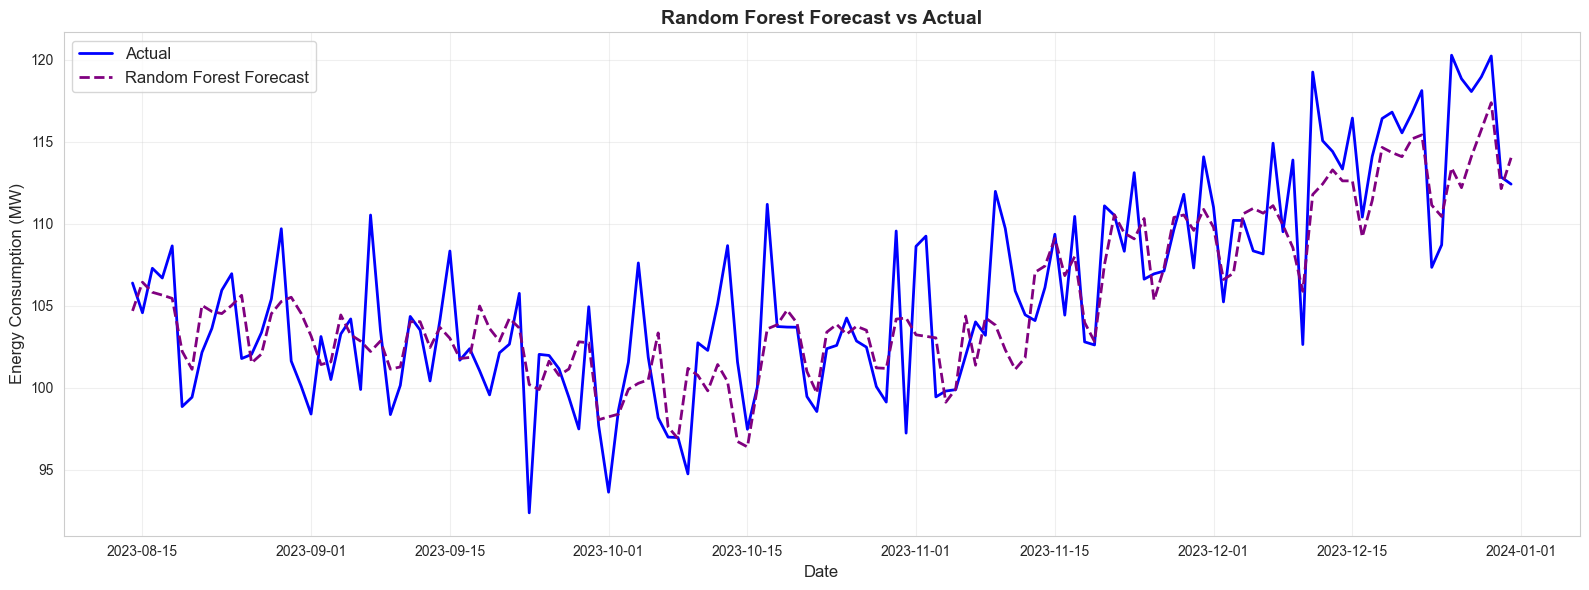

In [9]:
from sklearn.ensemble import RandomForestRegressor

print("=" * 60)
print("RANDOM FOREST TIME SERIES FORECASTING")
print("=" * 60)

# Split featured data
split_idx = int(len(df_features) * 0.8)
train_ml = df_features.iloc[:split_idx]
test_ml = df_features.iloc[split_idx:]

# Prepare X and y
feature_cols = [col for col in df_features.columns if col != 'energy_consumption']
X_train = train_ml[feature_cols]
y_train = train_ml['energy_consumption']
X_test = test_ml[feature_cols]
y_test = test_ml['energy_consumption']

print(f"\nTraining Random Forest on {len(X_train)} samples...")
print(f"Using {len(feature_cols)} features\n")

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict
rf_forecast = rf_model.predict(X_test)

# Metrics
rf_mae = mean_absolute_error(y_test, rf_forecast)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_forecast))
rf_mape = np.mean(np.abs((y_test - rf_forecast) / y_test)) * 100

print("✓ Random Forest trained successfully!")
print("\nRandom Forest Performance:")
print(f"  MAE:  {rf_mae:.2f} MW")
print(f"  RMSE: {rf_rmse:.2f} MW")
print(f"  MAPE: {rf_mape:.2f}%")

# Compare to baseline
improvement = (naive_mae - rf_mae) / naive_mae * 100
print(f"\nImprovement over naive baseline: {improvement:.1f}%")

# Feature importance
importances = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 Most Important Features:")
for idx, row in importances.head(5).iterrows():
    print(f"  {row['feature']:20s}: {row['importance']:.4f}")

# Visualize
plt.figure(figsize=(16, 6))
plt.plot(test_ml.index, y_test, label='Actual', color='blue', linewidth=2)
plt.plot(test_ml.index, rf_forecast, label='Random Forest Forecast', color='purple', linewidth=2, linestyle='--')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Energy Consumption (MW)', fontsize=12)
plt.title('Random Forest Forecast vs Actual', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---

## Cell 10: Model Comparison and Final Recommendations

### What
Comparing all forecasting approaches and providing recommendations.

### Why
Different models excel in different scenarios:
- Simple data: Naive might suffice
- Strong trends: ARIMA works well
- Complex patterns: ML models shine

### Technical Details
Model selection depends on:
- Data characteristics
- Computational resources
- Interpretability needs
- Production constraints

### Expected Output
Comparison table and deployment recommendations.

In [10]:
print("=" * 60)
print("MODEL COMPARISON SUMMARY")
print("=" * 60)

# Create comparison DataFrame
comparison = pd.DataFrame({
    'Model': ['Naive Baseline', 'Random Forest'],
    'MAE (MW)': [naive_mae, rf_mae],
    'RMSE (MW)': [naive_rmse, rf_rmse],
    'MAPE (%)': [naive_mape, rf_mape]
})

# Add ARIMA if available
try:
    comparison = pd.concat([comparison, pd.DataFrame({
        'Model': ['ARIMA'],
        'MAE (MW)': [arima_mae],
        'RMSE (MW)': [arima_rmse],
        'MAPE (%)': [arima_mape]
    })], ignore_index=True)
except:
    pass

display(comparison)

# Find best model
best_model_idx = comparison['MAE (MW)'].idxmin()
best_model = comparison.loc[best_model_idx, 'Model']
best_mae = comparison.loc[best_model_idx, 'MAE (MW)']

print(f"\n🏆 Best Model: {best_model}")
print(f"   MAE: {best_mae:.2f} MW")

print("\n" + "=" * 60)
print("RECOMMENDATIONS FOR PRODUCTION")
print("=" * 60)

print("\n1. SHORT-TERM FORECASTING (1-7 days):")
print("   - Use ML models (Random Forest, XGBoost)")
print("   - Include recent lags and weather data")
print("   - Update predictions daily")

print("\n2. LONG-TERM FORECASTING (months-years):")
print("   - Use statistical models (ARIMA, ETS) for trends")
print("   - Consider seasonal decomposition")
print("   - Account for economic indicators")

print("\n3. REAL-TIME OPERATIONS:")
print("   - Deploy lightweight models for speed")
print("   - Pre-compute features where possible")
print("   - Update with streaming data")

print("\n4. MODEL MAINTENANCE:")
print("   - Retrain monthly with new data")
print("   - Monitor forecast accuracy")
print("   - Detect concept drift")
print("   - A/B test model updates")

print("\n" + "=" * 60)
print("SAVE BEST MODEL FOR DEPLOYMENT")
print("=" * 60)

import joblib
joblib.dump(rf_model, 'energy_forecast_model.pkl')
print("\n✓ Model saved as 'energy_forecast_model.pkl'")
print("\nTo use in production:")
print("```python")
print("import joblib")
print("model = joblib.load('energy_forecast_model.pkl')")
print("forecast = model.predict(new_features)")
print("```")

MODEL COMPARISON SUMMARY


,Model,MAE (MW),RMSE (MW),MAPE (%)
0,Naive Baseline,9.166505,10.383171,8.942252
1,Random Forest,2.522721,3.269249,2.374706
2,ARIMA,5.358712,6.342935,5.140260



🏆 Best Model: Random Forest
   MAE: 2.52 MW

RECOMMENDATIONS FOR PRODUCTION

1. SHORT-TERM FORECASTING (1-7 days):
   - Use ML models (Random Forest, XGBoost)
   - Include recent lags and weather data
   - Update predictions daily

2. LONG-TERM FORECASTING (months-years):
   - Use statistical models (ARIMA, ETS) for trends
   - Consider seasonal decomposition
   - Account for economic indicators

3. REAL-TIME OPERATIONS:
   - Deploy lightweight models for speed
   - Pre-compute features where possible
   - Update with streaming data

4. MODEL MAINTENANCE:
   - Retrain monthly with new data
   - Monitor forecast accuracy
   - Detect concept drift
   - A/B test model updates

SAVE BEST MODEL FOR DEPLOYMENT

✓ Model saved as 'energy_forecast_model.pkl'

To use in production:
```python
import joblib
model = joblib.load('energy_forecast_model.pkl')
forecast = model.predict(new_features)
```


---

## Conclusions and Key Takeaways

### What We Accomplished

1. **Time Series Forecasting**: Predicted future energy consumption
2. **Multiple Approaches**: Statistical (ARIMA) and ML (Random Forest)
3. **Feature Engineering**: Created lag, rolling, and time features
4. **Proper Evaluation**: Temporal split, baseline comparison
5. **Production Ready**: Model saved for deployment

### Key Learnings

#### Time Series vs Other ML

| Aspect | Regular ML | Time Series |
|--------|-----------|-------------|
| Data Order | Doesn't matter | CRITICAL! |
| Split | Random shuffle | Temporal only |
| Features | Independent | Autocorrelated |
| Validation | K-fold CV | Walk-forward |
| Goal | Predict from X | Predict future |

#### Time Series Components

1. **Trend**: Long-term increase/decrease
2. **Seasonality**: Regular repeating patterns
3. **Cyclicality**: Longer irregular cycles
4. **Noise**: Random fluctuations

#### Forecasting Methods

**Statistical Models**:
- ARIMA: Classic, interpretable
- ETS: Exponential smoothing
- Prophet: Facebook's robust model
- Best for: Clean, well-behaved series

**Machine Learning**:
- Random Forest, XGBoost, LightGBM
- Needs feature engineering
- Best for: Complex patterns, multiple features

**Deep Learning**:
- LSTM, GRU: Sequential models
- Transformers: State-of-the-art
- Best for: Very complex, long sequences

### Business Value

**Energy Sector**:
- Optimize power generation schedules
- Reduce operational costs
- Better grid management
- Prevent blackouts

**Other Applications**:
- **Retail**: Demand forecasting
- **Finance**: Stock price prediction
- **Healthcare**: Patient admission forecasting
- **Manufacturing**: Production planning
- **Transportation**: Traffic prediction

### Critical Concepts

**1. Temporal Split**:
- NEVER randomly shuffle time series
- Always: past = train, future = test

**2. Baseline Models**:
- Always compare to simple baselines
- Naive, seasonal naive, moving average

**3. Feature Engineering**:
- Lag features crucial for ML
- Rolling statistics capture trends
- Time features add seasonality

**4. Walk-Forward Validation**:
- For production: use rolling window
- Retrain periodically
- Monitor performance drift

### Common Pitfalls

❌ **DON'T**:
- Shuffle time series data
- Use future data in features (data leakage!)
- Ignore seasonality
- Skip baseline comparison
- Forget to check stationarity

✓ **DO**:
- Temporal train-test split
- Feature engineering carefully
- Decompose series first
- Compare multiple models
- Monitor forecast accuracy

### Production Deployment

**Pipeline**:
1. Data collection (real-time or batch)
2. Feature engineering
3. Model prediction
4. Post-processing (bounds, smoothing)
5. Visualization and alerts

**Monitoring**:
- Track MAE, RMSE over time
- Detect forecast degradation
- Retrain triggers (schedule or performance)
- A/B test new models

### Resources

- [Forecasting: Principles and Practice](https://otexts.com/fpp3/)
- [Time Series Analysis in Python](https://www.statsmodels.org/)
- [Prophet Forecasting](https://facebook.github.io/prophet/)

---

**Author**: Bala Anbalagan  
**Date**: October 2025  
**Data**: Synthetic energy consumption  
**License**: MIT  

---

## Thank you for completing all 6 PyCaret tutorials!

**Key Achievement**: Mastered time series forecasting - the most complex ML task!

**Main Insight**: Time series requires special treatment due to temporal dependencies. Never shuffle, always split temporally!

**Next Steps**:
- Apply to real energy/sales/stock data
- Try deep learning (LSTM, Transformer)
- Deploy for production forecasting

**Congratulations on completing all 6 PyCaret AutoML tutorials! 🎉**